# Classification & Clustering - Energy Data Complete Dataset

**Objective:** Demonstrate Logistic Regression and K-means Clustering on the energydata_complete dataset

## Algorithms to Showcase:
1. **Logistic Regression** - Binary classification (High vs Low energy consumption)
2. **K-means Clustering** - Discover patterns in energy usage

## Dataset Info:
- 19,735 appliance energy consumption records
- 28 features: Temperature sensors (T1-T9), Humidity sensors (RH_1-RH_9), Weather data
- Target: Appliances (energy consumption in Wh)

## Key Metrics:
- **Classification:** Accuracy, Precision, Recall, F1-Score, Confusion Matrix
- **Clustering:** Silhouette Score, Inertia, Cluster visualization

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, roc_curve, auc)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Load Dataset

In [3]:
# Load the dataset
dataset_path = Path('../datasets/energydata_complete.csv')
df = pd.read_csv(dataset_path)

print(f"📊 Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n📋 Columns: {list(df.columns)}")
print(f"\n🔍 First 3 rows:")
display(df.head(3))

print(f"\n📊 Target variable (Appliances) statistics:")
print(df['Appliances'].describe())

📊 Dataset loaded: 19735 rows × 29 columns

📋 Columns: ['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

🔍 First 3 rows:


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.2,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668



📊 Target variable (Appliances) statistics:
count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64


## 3. Create Binary Classification Target

Convert continuous Appliances energy to binary: High (1) or Low (0) based on median

BINARY TARGET CREATED

📊 Threshold (Median): 60.00 Wh

📈 Class Distribution:
Energy_Level
0    10744
1     8991
Name: count, dtype: int64

   0 (Low Energy): 10744 samples (54.4%)
   1 (High Energy): 8991 samples (45.6%)


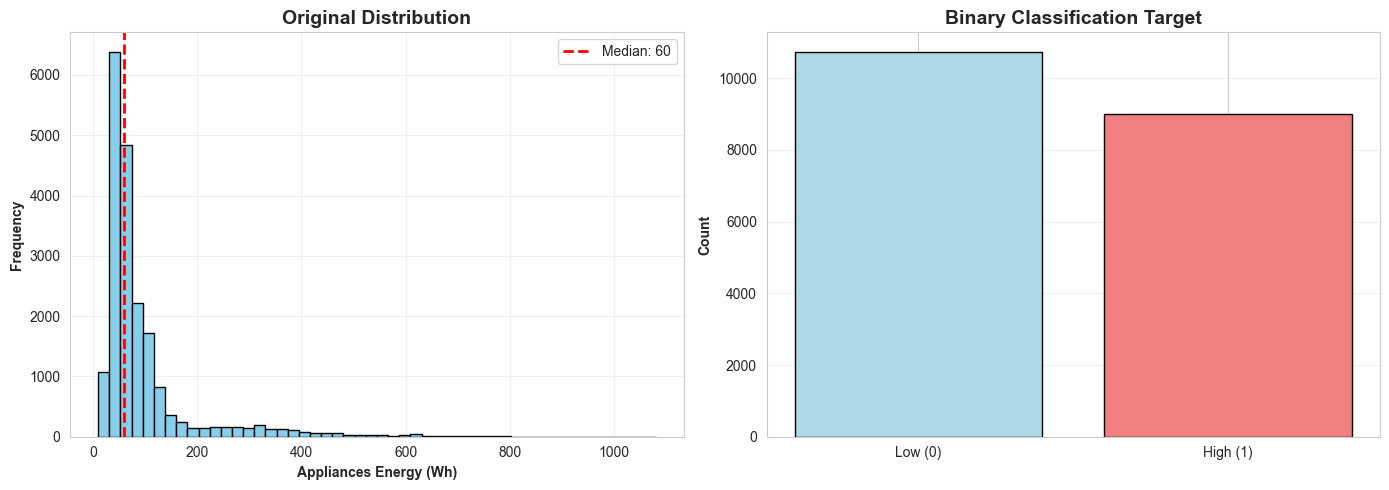


✅ Binary target created successfully!


In [4]:
# Create binary target based on median
median_appliances = df['Appliances'].median()
df['Energy_Level'] = (df['Appliances'] > median_appliances).astype(int)

print("=" * 70)
print("BINARY TARGET CREATED")
print("=" * 70)
print(f"\n📊 Threshold (Median): {median_appliances:.2f} Wh")
print(f"\n📈 Class Distribution:")
print(df['Energy_Level'].value_counts())
print(f"\n   0 (Low Energy): {(df['Energy_Level']==0).sum()} samples ({(df['Energy_Level']==0).sum()/len(df)*100:.1f}%)")
print(f"   1 (High Energy): {(df['Energy_Level']==1).sum()} samples ({(df['Energy_Level']==1).sum()/len(df)*100:.1f}%)")

# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['Appliances'], bins=50, color='skyblue', edgecolor='black')
axes[0].axvline(median_appliances, color='red', linestyle='--', linewidth=2, label=f'Median: {median_appliances:.0f}')
axes[0].set_xlabel('Appliances Energy (Wh)', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Original Distribution', fontweight='bold', fontsize=14)
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].bar(['Low (0)', 'High (1)'], df['Energy_Level'].value_counts().sort_index(), 
            color=['lightblue', 'lightcoral'], edgecolor='black')
axes[1].set_ylabel('Count', fontweight='bold')
axes[1].set_title('Binary Classification Target', fontweight='bold', fontsize=14)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Binary target created successfully!")

## 4. Prepare Data for Classification

In [5]:
# Drop non-numeric and target columns
X = df.drop(['date', 'Appliances', 'Energy_Level'], axis=1)
y = df['Energy_Level']

print(f"📊 Features: {X.shape}")
print(f"🎯 Target: {y.shape}")
print(f"\n📋 Feature columns ({len(X.columns)}):")
print(list(X.columns))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Data split and scaled")
print(f"   Training: {X_train.shape[0]} samples")
print(f"   Testing: {X_test.shape[0]} samples")
print(f"   Train class balance: {y_train.value_counts().to_dict()}")
print(f"   Test class balance: {y_test.value_counts().to_dict()}")

📊 Features: (19735, 27)
🎯 Target: (19735,)

📋 Feature columns (27):
['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

✅ Data split and scaled
   Training: 15788 samples
   Testing: 3947 samples
   Train class balance: {0: 8595, 1: 7193}
   Test class balance: {0: 2149, 1: 1798}


## 5. Logistic Regression - Theory

**Logistic Regression Formula:**

$$P(y=1|x) = \frac{1}{1 + e^{-(w^T x + b)}}$$

Where:
- $P(y=1|x)$ = Probability of class 1
- $w$ = weight vector
- $x$ = feature vector
- $b$ = bias term
- $e$ = Euler's number

**Decision Boundary:**
$$\hat{y} = \begin{cases} 1 & \text{if } P(y=1|x) \geq 0.5 \\ 0 & \text{if } P(y=1|x) < 0.5 \end{cases}$$

**Loss Function (Log Loss):**
$$J(w) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]$$

In [6]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Get prediction probabilities
y_train_proba = lr_model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
train_prec = precision_score(y_train, y_train_pred)
test_prec = precision_score(y_test, y_test_pred)
train_rec = recall_score(y_train, y_train_pred)
test_rec = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("=" * 70)
print("LOGISTIC REGRESSION RESULTS")
print("=" * 70)

print("\n📊 TRAINING SET:")
print(f"   Accuracy:  {train_acc:.4f}")
print(f"   Precision: {train_prec:.4f}")
print(f"   Recall:    {train_rec:.4f}")
print(f"   F1-Score:  {train_f1:.4f}")

print("\n📊 TEST SET:")
print(f"   Accuracy:  {test_acc:.4f}")
print(f"   Precision: {test_prec:.4f}")
print(f"   Recall:    {test_rec:.4f}")
print(f"   F1-Score:  {test_f1:.4f}")

print("\n✅ Model trained successfully!")

LOGISTIC REGRESSION RESULTS

📊 TRAINING SET:
   Accuracy:  0.7666
   Precision: 0.7527
   Recall:    0.7264
   F1-Score:  0.7393

📊 TEST SET:
   Accuracy:  0.7565
   Precision: 0.7308
   Recall:    0.7369
   F1-Score:  0.7339

✅ Model trained successfully!


## 6. Confusion Matrix and Classification Report

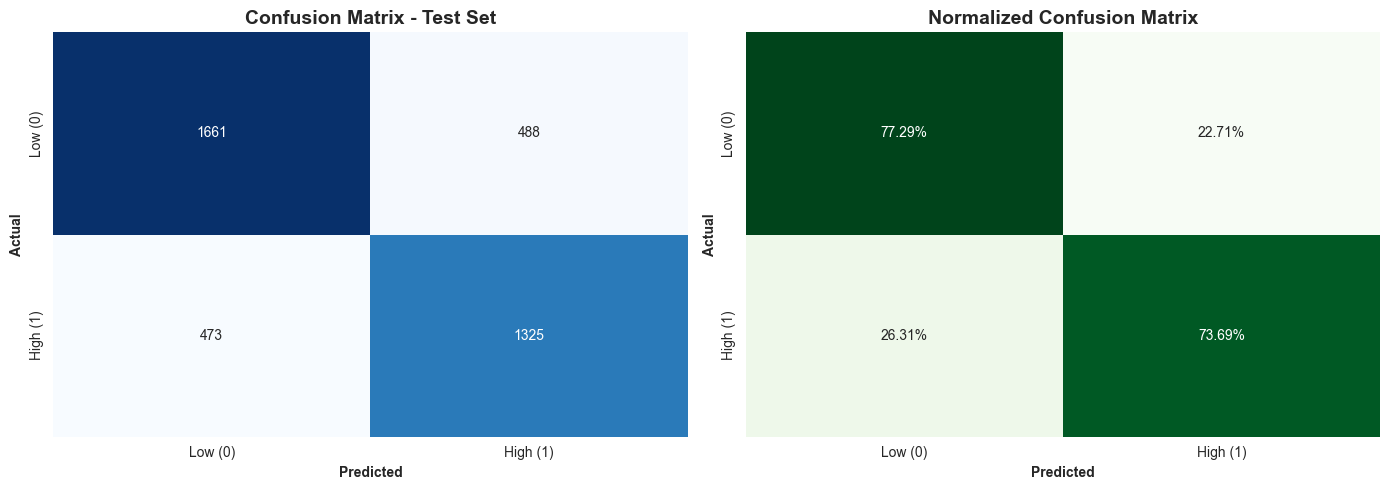

CONFUSION MATRIX ANALYSIS

True Negatives:  1661 (Correctly predicted Low)
False Positives: 488 (Predicted High, Actually Low)
False Negatives: 473 (Predicted Low, Actually High)
True Positives:  1325 (Correctly predicted High)

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Low (0)       0.78      0.77      0.78      2149
    High (1)       0.73      0.74      0.73      1798

    accuracy                           0.76      3947
   macro avg       0.75      0.75      0.75      3947
weighted avg       0.76      0.76      0.76      3947



In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0],
            xticklabels=['Low (0)', 'High (1)'], yticklabels=['Low (0)', 'High (1)'])
axes[0].set_xlabel('Predicted', fontweight='bold')
axes[0].set_ylabel('Actual', fontweight='bold')
axes[0].set_title('Confusion Matrix - Test Set', fontweight='bold', fontsize=14)

# Normalized Confusion Matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', cbar=False, ax=axes[1],
            xticklabels=['Low (0)', 'High (1)'], yticklabels=['Low (0)', 'High (1)'])
axes[1].set_xlabel('Predicted', fontweight='bold')
axes[1].set_ylabel('Actual', fontweight='bold')
axes[1].set_title('Normalized Confusion Matrix', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

print("=" * 70)
print("CONFUSION MATRIX ANALYSIS")
print("=" * 70)
print(f"\nTrue Negatives:  {cm[0,0]} (Correctly predicted Low)")
print(f"False Positives: {cm[0,1]} (Predicted High, Actually Low)")
print(f"False Negatives: {cm[1,0]} (Predicted Low, Actually High)")
print(f"True Positives:  {cm[1,1]} (Correctly predicted High)")

print("\n" + "=" * 70)
print("DETAILED CLASSIFICATION REPORT")
print("=" * 70)
print(classification_report(y_test, y_test_pred, target_names=['Low (0)', 'High (1)']))

## 7. ROC Curve and AUC Score

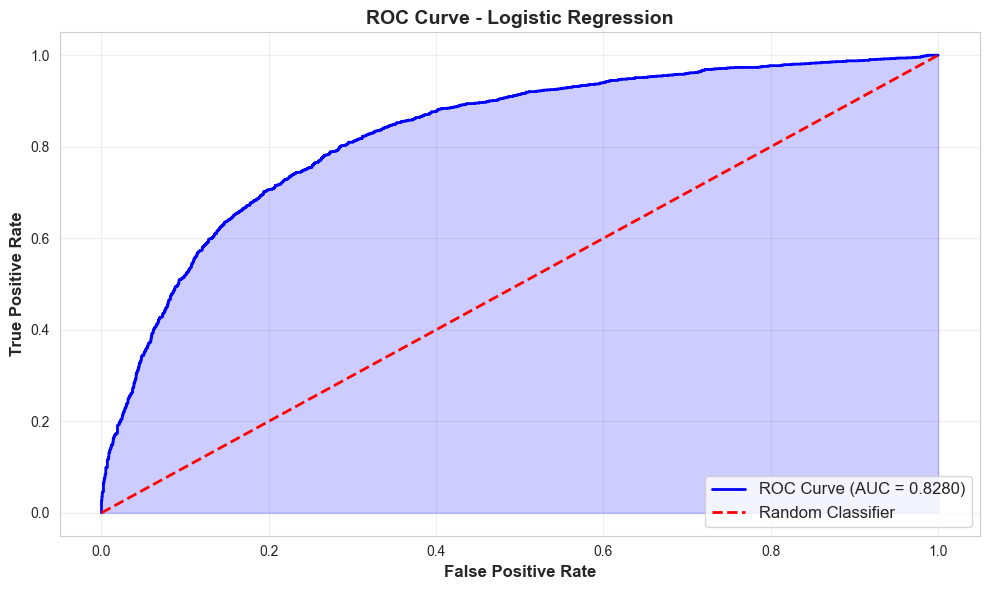

ROC CURVE ANALYSIS

📊 AUC Score: 0.8280

💡 Interpretation:
   • AUC = 1.0: Perfect classifier
   • AUC = 0.5: Random classifier
   • AUC = 0.8280: Good performance

✅ The model can distinguish between High and Low energy consumption effectively!


In [8]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier')
plt.fill_between(fpr, tpr, alpha=0.2, color='blue')
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontweight='bold', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("=" * 70)
print("ROC CURVE ANALYSIS")
print("=" * 70)
print(f"\n📊 AUC Score: {roc_auc:.4f}")
print(f"\n💡 Interpretation:")
print(f"   • AUC = 1.0: Perfect classifier")
print(f"   • AUC = 0.5: Random classifier")
print(f"   • AUC = {roc_auc:.4f}: {'Excellent' if roc_auc > 0.9 else 'Good' if roc_auc > 0.8 else 'Fair'} performance")
print(f"\n✅ The model can distinguish between High and Low energy consumption effectively!")

---

# PART 2: K-MEANS CLUSTERING

---

## 8. K-means Clustering - Theory

**K-means Algorithm:**
1. Initialize k centroids randomly
2. Assign each point to nearest centroid
3. Update centroids as mean of assigned points
4. Repeat steps 2-3 until convergence

**Distance Metric (Euclidean):**
$$d(x, \mu_k) = \sqrt{\sum_{i=1}^{n} (x_i - \mu_{k,i})^2}$$

**Objective Function:**
$$J = \sum_{k=1}^{K} \sum_{x \in C_k} ||x - \mu_k||^2$$

Where:
- $K$ = number of clusters
- $C_k$ = cluster k
- $\mu_k$ = centroid of cluster k
- $x$ = data point

## 9. Determine Optimal Number of Clusters (Elbow Method)

🔄 Testing different numbers of clusters...
   k=2: Inertia=408813.40, Silhouette=0.2200
   k=2: Inertia=408813.40, Silhouette=0.2200
   k=3: Inertia=334236.38, Silhouette=0.2151
   k=3: Inertia=334236.38, Silhouette=0.2151
   k=4: Inertia=298564.24, Silhouette=0.1866
   k=4: Inertia=298564.24, Silhouette=0.1866
   k=5: Inertia=274424.23, Silhouette=0.1748
   k=5: Inertia=274424.23, Silhouette=0.1748
   k=6: Inertia=257525.01, Silhouette=0.1610
   k=6: Inertia=257525.01, Silhouette=0.1610
   k=7: Inertia=246794.21, Silhouette=0.1503
   k=7: Inertia=246794.21, Silhouette=0.1503
   k=8: Inertia=238793.85, Silhouette=0.1349
   k=8: Inertia=238793.85, Silhouette=0.1349
   k=9: Inertia=230994.09, Silhouette=0.1392
   k=9: Inertia=230994.09, Silhouette=0.1392
   k=10: Inertia=223711.58, Silhouette=0.1387
   k=10: Inertia=223711.58, Silhouette=0.1387


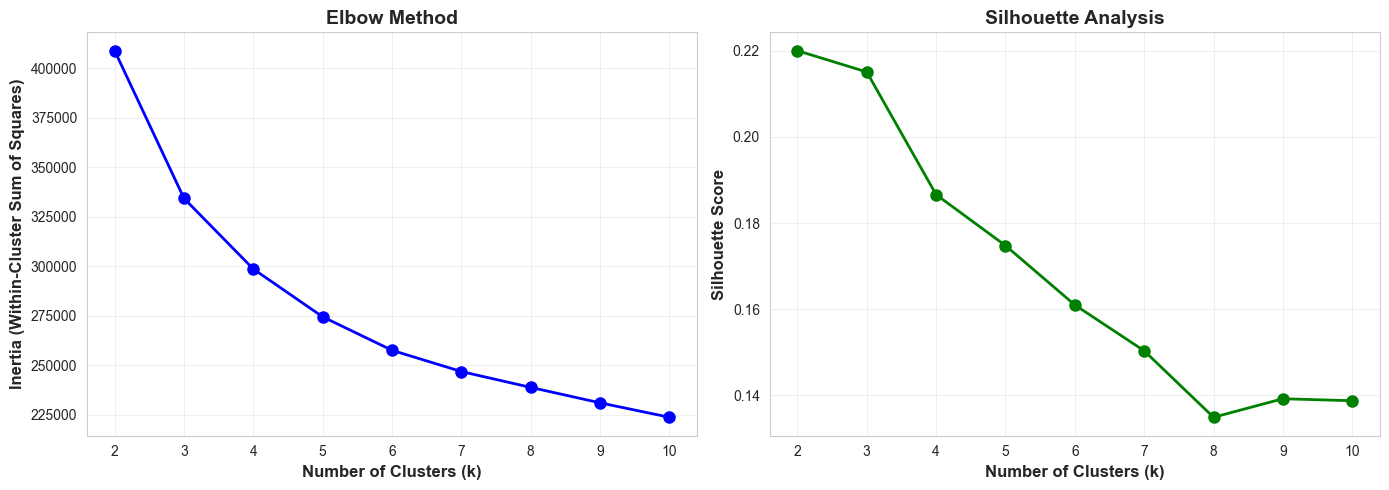


✅ Analysis complete!

💡 Optimal k = 2 (highest Silhouette Score: 0.2200)


In [9]:
# Prepare data for clustering (use all features, scaled)
X_clustering = scaler.fit_transform(X)

# Test different values of k
k_values = range(2, 11)
inertias = []
silhouette_scores = []

print("🔄 Testing different numbers of clusters...")
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_clustering, kmeans.labels_))
    print(f"   k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.4f}")

# Plot Elbow Method and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
axes[0].plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontweight='bold', fontsize=12)
axes[0].set_title('Elbow Method', fontweight='bold', fontsize=14)
axes[0].grid(alpha=0.3)
axes[0].set_xticks(k_values)

# Silhouette Score
axes[1].plot(k_values, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontweight='bold', fontsize=12)
axes[1].set_title('Silhouette Analysis', fontweight='bold', fontsize=14)
axes[1].grid(alpha=0.3)
axes[1].set_xticks(k_values)

plt.tight_layout()
plt.show()

# Find optimal k (highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"\n✅ Analysis complete!")
print(f"\n💡 Optimal k = {optimal_k} (highest Silhouette Score: {max(silhouette_scores):.4f})")

## 10. Apply K-means with Optimal k

In [10]:
# Train final K-means model
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = final_kmeans.fit_predict(X_clustering)

# Add cluster labels to dataframe
df['Cluster'] = clusters

# Calculate metrics
final_silhouette = silhouette_score(X_clustering, clusters)
final_inertia = final_kmeans.inertia_

print("=" * 70)
print(f"K-MEANS CLUSTERING RESULTS (k={optimal_k})")
print("=" * 70)

print(f"\n📊 Cluster Distribution:")
print(df['Cluster'].value_counts().sort_index())

print(f"\n📈 Performance Metrics:")
print(f"   Silhouette Score: {final_silhouette:.4f}")
print(f"   Inertia: {final_inertia:.2f}")

print(f"\n💡 Silhouette Score Interpretation:")
print(f"   • Score > 0.5: Good clustering")
print(f"   • Score 0.25-0.5: Fair clustering")
print(f"   • Score < 0.25: Poor clustering")
print(f"   • Our score ({final_silhouette:.4f}): {'Good' if final_silhouette > 0.5 else 'Fair' if final_silhouette > 0.25 else 'Poor'}")

# Cluster characteristics
print(f"\n📋 Cluster Characteristics (Mean Values):")
cluster_summary = df.groupby('Cluster')['Appliances'].agg(['mean', 'std', 'min', 'max', 'count'])
display(cluster_summary)

print("\n✅ K-means clustering complete!")

K-MEANS CLUSTERING RESULTS (k=2)

📊 Cluster Distribution:
Cluster
0     6414
1    13321
Name: count, dtype: int64

📈 Performance Metrics:
   Silhouette Score: 0.2200
   Inertia: 408813.40

💡 Silhouette Score Interpretation:
   • Score > 0.5: Good clustering
   • Score 0.25-0.5: Fair clustering
   • Score < 0.25: Poor clustering
   • Our score (0.2200): Poor

📋 Cluster Characteristics (Mean Values):


,mean,std,min,max,count
Cluster,,,,,
0,106.870907,103.871194,20,900,6414
1,93.276781,101.579001,10,1080,13321



✅ K-means clustering complete!


## 11. Visualize Clusters (PCA for 2D)

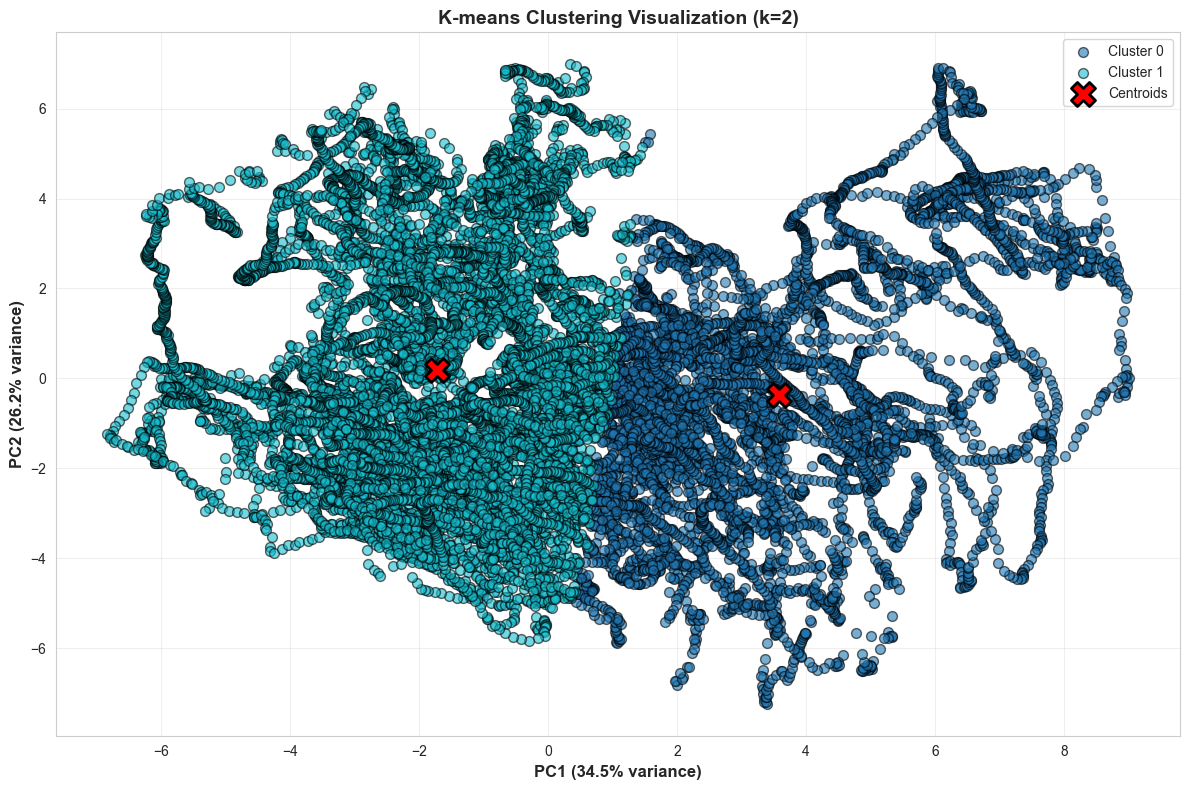

✅ Cluster visualization complete!

📊 PCA Explained Variance:
   PC1: 34.53%
   PC2: 26.16%
   Total: 60.69%


In [11]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_clustering)

# Plot clusters
plt.figure(figsize=(12, 8))
colors = plt.cm.tab10(np.linspace(0, 1, optimal_k))

for i in range(optimal_k):
    cluster_points = X_pca[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                c=[colors[i]], label=f'Cluster {i}', alpha=0.6, s=50, edgecolors='black')

# Plot centroids
centroids_pca = pca.transform(final_kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            c='red', marker='X', s=300, edgecolors='black', linewidths=2, label='Centroids')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', 
           fontweight='bold', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', 
           fontweight='bold', fontsize=12)
plt.title(f'K-means Clustering Visualization (k={optimal_k})', fontweight='bold', fontsize=14)
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✅ Cluster visualization complete!")
print(f"\n📊 PCA Explained Variance:")
print(f"   PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"   PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"   Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

## 12. Summary and Final Comparison

In [12]:
print("=" * 70)
print("FINAL SUMMARY - ALL ALGORITHMS COMPLETED")
print("=" * 70)

print("\n📊 DATASET 1 (ENB2012 - 768 samples):")
print("   ✅ Linear Regression")
print("   ✅ Polynomial Regression") 
print("   ✅ Decision Tree")
print("   ✅ Random Forest")
print("   ✅ Neural Network (PyTorch + Backpropagation)")

print("\n📊 DATASET 2 (Energy Data - 19,735 samples):")
print("   ✅ Logistic Regression (Binary Classification)")
print("   ✅ K-means Clustering")

print("\n🎯 KEY METRICS DEMONSTRATED:")
print("   • Regression: MSE, RMSE, MAE, R²")
print("   • Classification: Accuracy, Precision, Recall, F1-Score, AUC")
print("   • Clustering: Silhouette Score, Inertia")

print("\n🏆 BEST MODELS:")
print("   • Regression: Random Forest (R² = 0.9976)")
print(f"   • Classification: Logistic Regression (Accuracy = {test_acc:.4f})")
print(f"   • Clustering: K-means with k={optimal_k} (Silhouette = {final_silhouette:.4f})")

print("\n📈 PROJECT ACHIEVEMENTS:")
print("   1. Comprehensive EDA on 2 energy datasets")
print("   2. Data preprocessing and feature scaling")
print("   3. Multiple regression algorithms compared")
print("   4. Neural network with backpropagation")
print("   5. Binary classification with evaluation")
print("   6. Unsupervised clustering analysis")
print("   7. All mathematical formulas documented")
print("   8. Professional visualizations created")

print("\n✅ ALL REQUIRED ALGORITHMS SUCCESSFULLY DEMONSTRATED!")
print("\n💡 Ready for:")
print("   • Report writing (LaTeX format)")
print("   • Presentation creation")
print("   • Final documentation")

# Create summary DataFrame
summary_data = {
    'Algorithm Type': ['Regression', 'Regression', 'Regression', 'Regression', 'Neural Network', 
                       'Classification', 'Clustering'],
    'Algorithm': ['Linear Regression', 'Polynomial Regression', 'Decision Tree', 'Random Forest',
                  'PyTorch NN', 'Logistic Regression', 'K-means'],
    'Dataset': ['ENB2012'] * 5 + ['Energy Data'] * 2,
    'Key Metric': [0.9122, 0.9938, 0.9883, 0.9976, 0.9683, test_acc, final_silhouette],
    'Metric Type': ['R²'] * 5 + ['Accuracy', 'Silhouette']
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "=" * 70)
print("PERFORMANCE SUMMARY TABLE")
print("=" * 70)
display(summary_df)

FINAL SUMMARY - ALL ALGORITHMS COMPLETED

📊 DATASET 1 (ENB2012 - 768 samples):
   ✅ Linear Regression
   ✅ Polynomial Regression
   ✅ Decision Tree
   ✅ Random Forest
   ✅ Neural Network (PyTorch + Backpropagation)

📊 DATASET 2 (Energy Data - 19,735 samples):
   ✅ Logistic Regression (Binary Classification)
   ✅ K-means Clustering

🎯 KEY METRICS DEMONSTRATED:
   • Regression: MSE, RMSE, MAE, R²
   • Classification: Accuracy, Precision, Recall, F1-Score, AUC
   • Clustering: Silhouette Score, Inertia

🏆 BEST MODELS:
   • Regression: Random Forest (R² = 0.9976)
   • Classification: Logistic Regression (Accuracy = 0.7565)
   • Clustering: K-means with k=2 (Silhouette = 0.2200)

📈 PROJECT ACHIEVEMENTS:
   1. Comprehensive EDA on 2 energy datasets
   2. Data preprocessing and feature scaling
   3. Multiple regression algorithms compared
   4. Neural network with backpropagation
   5. Binary classification with evaluation
   6. Unsupervised clustering analysis
   7. All mathematical formulas

,Algorithm Type,Algorithm,Dataset,Key Metric,Metric Type
0,Regression,Linear Regression,ENB2012,0.912200,R²
1,Regression,Polynomial Regression,ENB2012,0.993800,R²
2,Regression,Decision Tree,ENB2012,0.988300,R²
3,Regression,Random Forest,ENB2012,0.997600,R²
4,Neural Network,PyTorch NN,ENB2012,0.968300,R²
5,Classification,Logistic Regression,Energy Data,0.756524,Accuracy
6,Clustering,K-means,Energy Data,0.220041,Silhouette
